# Wholesale customer: Hierarchical clustering

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sci
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wholesale customer.csv')
df.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,2,3,12669,9656,7561,214,2674,1338
1,2,2,3,7057,9810,9568,1762,3293,1776
2,3,2,3,6353,8808,7684,2405,3516,7844
3,4,1,3,13265,1196,4221,6404,507,1788
4,5,2,3,22615,5410,7198,3915,1777,5185


### 1. Use dendrogram to determine the number of clusters based on the following variables: Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen. How many clusters would you choose and why?

Text(0, 0.5, 'Euclidean distance')

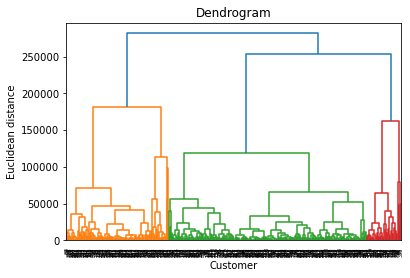

In [3]:
x=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
x=df.iloc[:, 3:]  # alternative
sci.dendrogram(sci.linkage(x, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')

- `sci.dendrogram(sci.linkage(x, method='ward'))`: performs hierarchical/agglomerative clustering.
    - The 'ward' method is a criterion used in agglomerative clustering that minimizes the total within-cluster variance. With this method, at each step, the pair of clusters with the minimum between-cluster distance are merged.
    - Alternative linkage methods include single, complete, average, centroid, median linkage.
    - `sci.dendrogram()` takes the linkage matrix produced by `sci.linkage()` and creates a dendrogram visualization. A dendrogram is a tree-like diagram that records the sequences of merges or splits.

- 4 cluster solution seems reasonable (by drawing a horizontal line at about 17500 of Euclidean distance)

### 2. Perform a hierarchical clustering analysis based on the agglomerative method using the number of clusters you determined. Add predicted clusters to the data

In [4]:
ac=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(x)
df['cluster']=ac.labels_  # cluster label
df.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
0,1,2,3,12669,9656,7561,214,2674,1338,2
1,2,2,3,7057,9810,9568,1762,3293,1776,2
2,3,2,3,6353,8808,7684,2405,3516,7844,2
3,4,1,3,13265,1196,4221,6404,507,1788,2
4,5,2,3,22615,5410,7198,3915,1777,5185,3


- `AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(X)`: This line initializes the agglomerative clustering algorithm
    - `n_clusters=4` specifies four clusters.
    - `affinity='euclidean'` (Default) uses euclidean distance as the distance measure between data points.
    - `linkage='ward'` (Default) specifies the Ward linkage which minimizes the sum of squared differences within all clusters. 
- `df['cluster'] = ac.labels_` : After the fitting process, the cluster labels for each data point are stored in ac.labels_. This line adds a new column to your DataFrame df called 'cluster'.

### 3. Customers in each cluster

In [5]:
df.groupby('cluster').count()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster,,,,,,,,,
0,45,45,45,45,45,45,45,45,45
1,23,23,23,23,23,23,23,23,23
2,261,261,261,261,261,261,261,261,261
3,111,111,111,111,111,111,111,111,111


- `df.groupby('cluster')`: splits the DataFrame into groups based on the values in the 'cluster' column. 
- `count()`: counts the number of entries for each column in each cluster.

### 4. Report the average annual spending on each product by cluster. Interpret (profile) each customer segment.

In [6]:
df.groupby('cluster').mean()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster,,,,,,,,,
0,199.133333,2.000000,2.488889,7027.422222,17689.955556,28873.333333,1649.377778,13344.422222,1837.688889
1,214.260870,1.086957,2.695652,49287.869565,6583.695652,6108.434783,9744.000000,971.782609,4628.043478
2,225.505747,1.283525,2.540230,5779.628352,4560.091954,5727.279693,2508.191571,2012.122605,1159.486590
3,218.684685,1.189189,2.540541,20917.054054,3718.018018,5080.612613,3591.693694,1079.666667,1614.198198


- `mean()`: calculates the average of each feature within each group. The result is the centroid of each cluster in terms of the original features, representing the "center" of the data points in each cluster.

In [7]:
pd.options.display.float_format = "{:.2f}".format  # print two decimals

df.groupby('cluster').mean()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster,,,,,,,,,
0,199.13,2.00,2.49,7027.42,17689.96,28873.33,1649.38,13344.42,1837.69
1,214.26,1.09,2.70,49287.87,6583.70,6108.43,9744.00,971.78,4628.04
2,225.51,1.28,2.54,5779.63,4560.09,5727.28,2508.19,2012.12,1159.49
3,218.68,1.19,2.54,20917.05,3718.02,5080.61,3591.69,1079.67,1614.20


- `pd.options.display.float_format`: This line sets an option for formatting floating-point numbers. It uses Python's string formatting method to specify the format.
- `"{:.2f}".format` formats the floating-point number with 2 places after the decimal point.

 - Cluster 0 has highest spending on Milk, Grocery, Detergents_Paper
 - Cluster 1 has highest spending on Fresh, Frozen, Delicatessen

### 5. Select the segment whose spending on Fresh is the highest. Report top 5 customers whose spending on Fresh is the highest within the segment.

In [8]:
df.loc[df.cluster==1].head()  # .loc can be omitted
df[df.cluster==1].head() 

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
29,30,1,3,43088,2100,2609,1200,1107,823,1
39,40,1,3,56159,555,902,10002,212,2916,1
52,53,2,3,40721,3916,5876,532,2587,1278,1
87,88,1,3,43265,5025,8117,6312,1579,14351,1
103,104,1,3,56082,3504,8906,18028,1480,2498,1


- `df.loc[df.cluster==1]`: the loc accessor allows for label-based indexing. `.loc` can be omited in this case.
- `df.cluster==1` creates a boolean mask. Every record where the 'cluster' column's value is 1 will have True in the corresponding position in the mask, and all others will be False.
- By passing this mask to loc, you filter the DataFrame to include only the rows where the condition is True (i.e., only records belonging to cluster 1).

In [9]:
df.loc[df.cluster==1].sort_values('Fresh', ascending=False).head()  # .loc can be omitted
df[df.cluster==1].sort_values('Fresh', ascending=False).head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
181,182,1,3,112151,29627,18148,16745,4948,8550,1
125,126,1,3,76237,3473,7102,16538,778,918,1
284,285,1,3,68951,4411,12609,8692,751,2406,1
39,40,1,3,56159,555,902,10002,212,2916,1
258,259,1,1,56083,4563,2124,6422,730,3321,1


- `sort_values('Fresh', ascending=False)`: sorts the DataFrame based on the values in the 'Fresh' column.
- `ascending=False`: The sorting will be in descending order (highest values at the top).